In [ ]:
from google.colab import files
uploaded = files.upload()



Saving corpus.txt to corpus (1).txt


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Loaded file: corpus (1).txt
Total Tokens: 90874
Total Types: 8871
Type Token Ratio (TTR): 0.09761868081079296


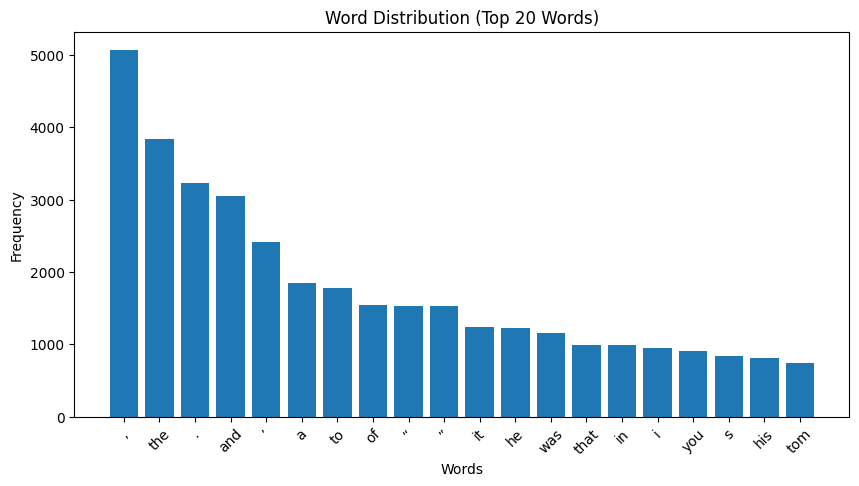

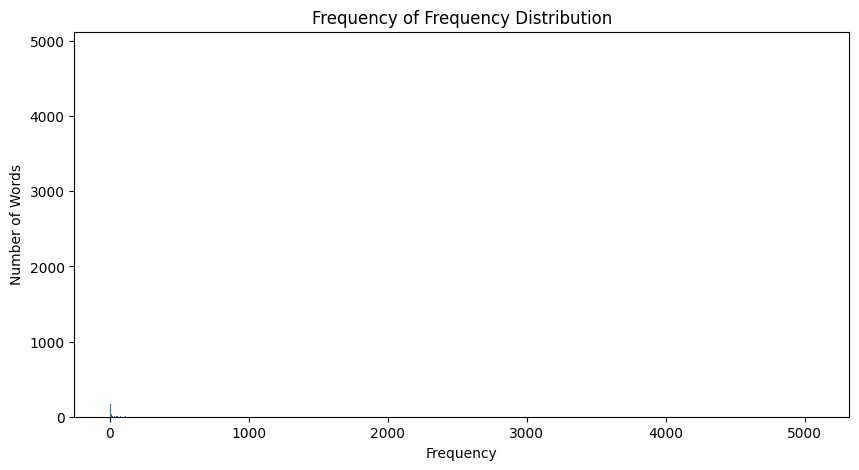

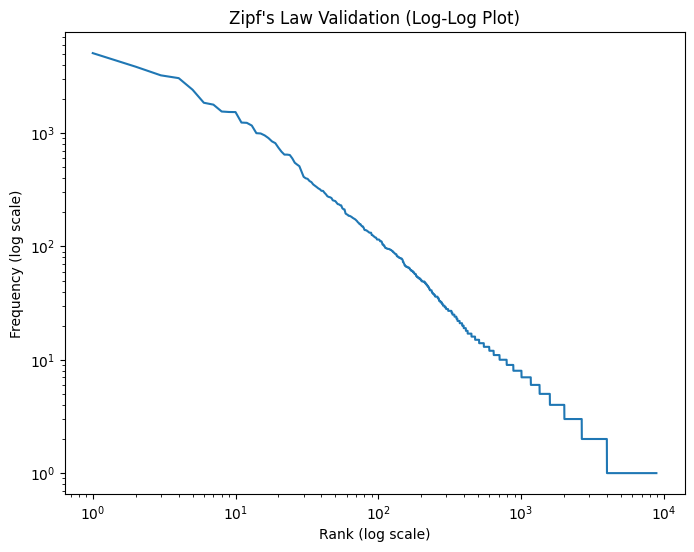

First 10 values of (frequency × rank):
[5068, 7690, 9681, 12196, 12055, 11094, 12460, 12384, 13797, 15300]


In [ ]:
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

# Read Corpus File

filename = list(uploaded.keys())[0]
print("Loaded file:", filename)

with open(filename, "r", encoding="utf-8") as file:
    text = file.read()

tokens = word_tokenize(text.lower())

print("Total Tokens:", len(tokens))
print("Total Types:", len(set(tokens)))

# Type Token Ratio (TTR)

types = set(tokens)
ttr = len(types) / len(tokens)
print("Type Token Ratio (TTR):", ttr)

# Word Frequency Distribution

freq_dist = Counter(tokens)
most_common = freq_dist.most_common(20)

words = [word for word, freq in most_common]
frequencies = [freq for word, freq in most_common]

plt.figure(figsize=(10,5))
plt.bar(words, frequencies)
plt.title("Word Distribution (Top 20 Words)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# Frequency of Frequency Distribution

freq_of_freq = Counter(freq_dist.values())

fof_x = list(freq_of_freq.keys())
fof_y = list(freq_of_freq.values())

plt.figure(figsize=(10,5))
plt.bar(fof_x, fof_y)
plt.title("Frequency of Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Number of Words")
plt.show()

# Zipf's Law Validation

sorted_freq = sorted(freq_dist.values(), reverse=True)
ranks = range(1, len(sorted_freq) + 1)

plt.figure(figsize=(8,6))
plt.plot(ranks, sorted_freq)
plt.xscale("log")
plt.yscale("log")
plt.title("Zipf's Law Validation (Log-Log Plot)")
plt.xlabel("Rank (log scale)")
plt.ylabel("Frequency (log scale)")
plt.show()

zipf_values = [f*r for f, r in zip(sorted_freq, ranks)]
print("First 10 values of (frequency × rank):")
print(zipf_values[:10])
